# Bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import numpy.random as rnd
from keras.datasets import mnist
from keras.datasets import imdb
import numpy as np

from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt

C:\Users\Sebastian\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Edito estilo de graficos

In [34]:
from jupyterthemes import jtplot

jtplot.style(theme='onedork')
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
jtplot.style(figsize=(20, 10))

# Cargo dataset

In [16]:

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

np.sort(train_data[0])

array([   1,    2,    2,    2,    2,    2,    2,    4,    4,    4,    4,
          4,    4,    4,    4,    4,    4,    4,    4,    4,    4,    4,
          5,    5,    5,    5,    5,    5,    5,    5,    5,    6,    6,
          6,    7,    7,    8,    8,    8,    9,   12,   12,   12,   12,
         12,   12,   13,   13,   13,   14,   14,   14,   15,   15,   15,
         15,   16,   16,   16,   16,   16,   16,   16,   16,   16,   16,
         16,   17,   17,   17,   18,   18,   18,   19,   19,   21,   22,
         22,   22,   22,   22,   22,   25,   25,   25,   25,   26,   26,
         26,   28,   28,   30,   32,   32,   32,   33,   33,   35,   36,
         36,   36,   36,   38,   38,   38,   38,   39,   43,   43,   43,
         43,   46,   48,   50,   50,   51,   51,   52,   56,   62,   65,
         65,   66,   66,   71,   71,   76,   77,   82,   87,   88,   88,
         92,   98,  100,  103,  104,  104,  106,  107,  112,  112,  113,
        117,  124,  130,  134,  135,  141,  144,  1

# Preparo informacion para mandar

In [17]:

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


# Creo la red y la entreno

In [62]:
epochs = 20

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])


x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 234us/step - loss: 0.4772 - acc: 0.7795 - val_loss: 0.3202 - val_acc: 0.8806
Epoch 2/20
15000/15000 [==============================] - 3s 201us/step - loss: 0.2585 - acc: 0.9059 - val_loss: 0.2810 - val_acc: 0.8890
Epoch 3/20
15000/15000 [==============================] - 3s 201us/step - loss: 0.1919 - acc: 0.9293 - val_loss: 0.3020 - val_acc: 0.8816
Epoch 4/20
15000/15000 [==============================] - 3s 200us/step - loss: 0.1392 - acc: 0.9501 - val_loss: 0.3887 - val_acc: 0.8521
Epoch 5/20
15000/15000 [==============================] - 3s 201us/step - loss: 0.1061 - acc: 0.9651 - val_loss: 0.3365 - val_acc: 0.8829
Epoch 6/20
15000/15000 [==============================] - 3s 211us/step - loss: 0.0741 - acc: 0.9765 - val_loss: 0.3635 - val_acc: 0.8773
Epoch 7/20
15000/15000 [==============================] - 3s 201us/step - loss: 0.0593 - acc: 0.9810 - val_loss: 0.3935 - 

# Grafico

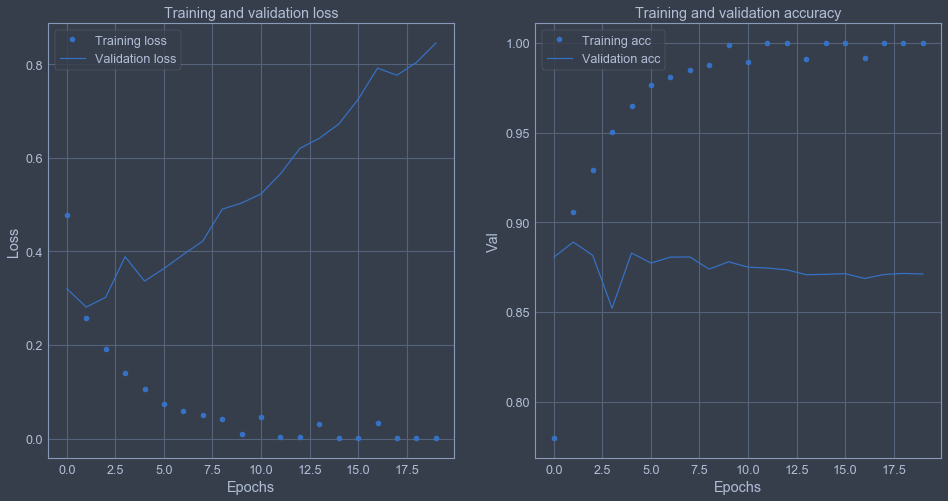

In [63]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epoch = range(epochs)
# plt.figure(figsize=(10,10))
plt.subplot(121)
plt.plot(epoch, loss_values, 'bo', label='Training loss')
plt.plot(epoch, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.show()

plt.subplot(122)
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epoch, acc_values, 'bo', label='Training acc')
plt.plot(epoch, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Val')
plt.legend()


plt.show()

# Usando CNN

In [65]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 143s 2ms/step - loss: 0.3875 - acc: 0.8820 - val_loss: 0.0901 - val_acc: 0.9714
Epoch 2/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0992 - acc: 0.9698 - val_loss: 0.0558 - val_acc: 0.9823
Epoch 3/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0729 - acc: 0.9772 - val_loss: 0.0405 - val_acc: 0.9871
Epoch 4/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0596 - acc: 0.9815 - val_loss: 0.0359 - val_acc: 0.9879
Epoch 5/10
60000/60000 [==============================] - 141s 2ms/step - loss: 0.0511 - acc: 0.9840 - val_loss: 0.0350 - val_acc: 0.9889
Epoch 6/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0439 - acc: 0.9861 - val_loss: 0.0284 - val_acc: 0.9913
Epoch 7/10
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0384 - acc: 0.9878 - val_loss: 0.0300 - 

In [ ]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

# Pruebo la red

In [ ]:
pic = np.random.randint(10000)

plt.imshow(X_train[pic][0], cmap = "Greys")
test = (model.predict(X_train[pic].reshape(1,1,28,28)))

print(test.argmax())

In [129]:
a = [2,3,3,3,3,3,3,3,3]
b = np.asarray([a,a,a,a,a,a,a])
print(b.size)


63
